## Web Scrapping And Analysis of "list of most popular website" from Wikipedia

In [1]:
# import necessary libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
# Request for the HTML response using the URL

wikipedia_url = "https://en.wikipedia.org/wiki/List_of_most_visited_websites"
response = requests.get(wikipedia_url)
print(response.status_code)


200


In [3]:
# parse data from the html into a beautifulsoup object

soup = BeautifulSoup(response.text, "html.parser")
website_table = soup.find("table", {"class":"wikitable"})

In [4]:
# puting the table into a dataframe

popular_website_df = pd.read_html(str(website_table))
df = pd.DataFrame(popular_website_df[0])
df.head()

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Principal country/territory
0,Google Search,google.com,1 (),Computers Electronics and Technology > Search ...,United States
1,YouTube,youtube.com,2 (),Arts & Entertainment > TV Movies and Streaming,United States
2,Facebook,facebook.com,3 (),Computers Electronics and Technology > Social ...,United States
3,Twitter,twitter.com,4 (),Computers Electronics and Technology > Social ...,United States
4,Instagram,instagram.com,5 (),Computers Electronics and Technology > Social ...,United States


## Cleaning the dataframe

In [5]:
# renaming the column for easy access

df = df.rename(columns = {'Similarweb top 50websites ranking(As of April 1, 2022[1]': "SimilarWeb Ranking", "Principal country/territory":"Country"})

df.head()

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country
0,Google Search,google.com,1 (),Computers Electronics and Technology > Search ...,United States
1,YouTube,youtube.com,2 (),Arts & Entertainment > TV Movies and Streaming,United States
2,Facebook,facebook.com,3 (),Computers Electronics and Technology > Social ...,United States
3,Twitter,twitter.com,4 (),Computers Electronics and Technology > Social ...,United States
4,Instagram,instagram.com,5 (),Computers Electronics and Technology > Social ...,United States


In [6]:
# splitting the category column

df[['Category', 'SubCategory']] = df['Category'].str.split(" > ", expand = True)
df.head()

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country,SubCategory
0,Google Search,google.com,1 (),Computers Electronics and Technology,United States,Search Engines
1,YouTube,youtube.com,2 (),Arts & Entertainment,United States,TV Movies and Streaming
2,Facebook,facebook.com,3 (),Computers Electronics and Technology,United States,Social Networks and Online Communities
3,Twitter,twitter.com,4 (),Computers Electronics and Technology,United States,Social Networks and Online Communities
4,Instagram,instagram.com,5 (),Computers Electronics and Technology,United States,Social Networks and Online Communities


In [7]:
df.columns


Index(['Site', 'Domain Name',
       'Similarweb top 50websites ranking(As of April 1, 2022[1]', 'Category',
       'Country', 'SubCategory'],
      dtype='object')

In [8]:
df[["SmilarWeb Rank", "nonsense_to_remove"]] = df.iloc[:,2].str.split(" ", expand = True)
df.head()

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country,SubCategory,SmilarWeb Rank,nonsense_to_remove
0,Google Search,google.com,1 (),Computers Electronics and Technology,United States,Search Engines,1,()
1,YouTube,youtube.com,2 (),Arts & Entertainment,United States,TV Movies and Streaming,2,()
2,Facebook,facebook.com,3 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,3,()
3,Twitter,twitter.com,4 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,4,()
4,Instagram,instagram.com,5 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,5,()
5,Baidu,baidu.com,6 (),Computers Electronics and Technology,China,Search Engines,6,()
6,Wikipedia,wikipedia.org,7 (),Reference Materials,United States,Dictionaries and Encyclopedias,7,()
7,Yandex,yandex.ru,8 (),Computers Electronics and Technology,Russia,Search Engines,8,()
8,Yahoo,yahoo.com,9 (),News and Media,United States,None,9,()
9,xVideos,xvideos.com,10 (),Adult content,Czech Republic,None,10,()


In [9]:
df.columns

Index(['Site', 'Domain Name',
       'Similarweb top 50websites ranking(As of April 1, 2022[1]', 'Category',
       'Country', 'SubCategory', 'SmilarWeb Rank', 'nonsense_to_remove'],
      dtype='object')

In [10]:
df = df[['Site', 'Domain Name', 'Category', 'SubCategory', 'Country', 'SmilarWeb Rank']]
df.head()

,Site,Domain Name,Category,SubCategory,Country,SmilarWeb Rank
0,Google Search,google.com,Computers Electronics and Technology,Search Engines,United States,1
1,YouTube,youtube.com,Arts & Entertainment,TV Movies and Streaming,United States,2
2,Facebook,facebook.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,3
3,Twitter,twitter.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,4
4,Instagram,instagram.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,5


In [11]:
# top countries with highest number of high ranked website is The United State, followed by Rusia

df["Country"].value_counts()

United States     30
Russia             6
China              4
Japan              2
Brazil             2
South Korea        2
Czech Republic     2
Canada             1
Cyprus             1
Name: Country, dtype: int64

NameError: name 'top_country' is not defined

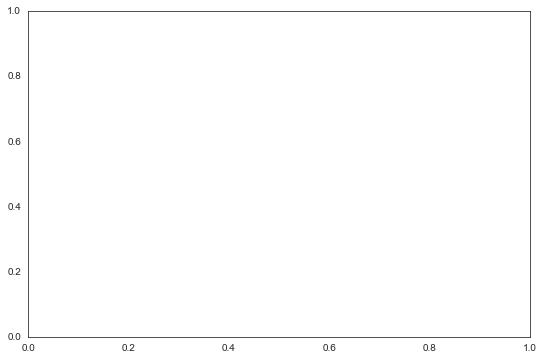

In [12]:

# creating the plot
figure, axis = plt.subplots(figsize = (9,6))

top_country = df["Country"].value_counts()

plot = axis.barh(top_country.index, top_country)
plt.title('Number of Top website by Country', size=25)
plt.xlabel('Number of Website', size = 20)
plt.ylabel('Country', size = 20)

for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha = 'center', va ='bottom')

plt.savefig('barhchat.png', bbox_inches='tight')
plt.show();

In [ ]:
# top ten website

df.groupby("Country")["SmilarWeb Rank"].count()

In [ ]:
# number of top site by Domain name

df["Category"].value_counts()

In [ ]:
# creating the plot

top_category = df["Category"].value_counts()


figure, axis = plt.subplots(figsize = (9,6))

plot = axis.barh(top_category.index, top_category)
plt.title('Categories with most rank website', size=25)
plt.xlabel('Number of Website', size = 20)
plt.ylabel('Categories', size = 20)

for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha = 'center', va ='bottom')

plt.savefig('barhchat.png', bbox_inches='tight')
plt.show();

In [ ]:
df.columns